In [1]:
from mmpose.core.visualization.image import imshow_keypoints 

/UHome/qtly_u/.conda/envs/ViTPose/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt

In [79]:
# JSON 파일 읽기
json_file_path = "/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/work_dirs/result_keypoints_valid.json"
with open(json_file_path, 'r') as f:
    result = json.load(f)

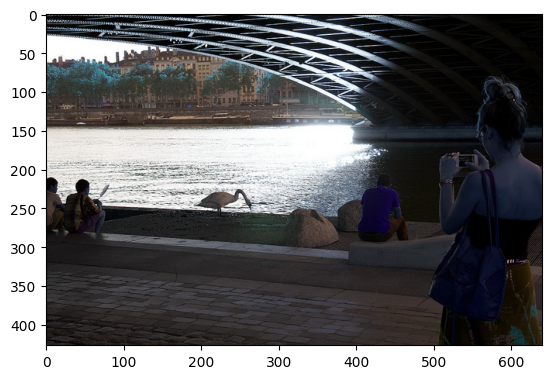

In [80]:
image_id = 1268
img_path ='/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/data/coco/val2017/'+str(image_id).zfill(12)+'.jpg'
img = cv2.imread(img_path)
plt.imshow(img)

In [110]:
def visualize_pose(image_id):
    # 이미지 파일 경로 설정
    image_path ='/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/data/coco/val2017/'+str(image_id).zfill(12)+'.jpg'

    # 이미지 로드
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 해당 이미지에 대한 정보 추출
    image_info_list = [item for item in result if item["image_id"] == image_id]

    # Pose 시각화
    for image_info in image_info_list:
        keypoints = np.array(image_info["keypoints"]).reshape(-1, 3)
        
        # 관절 연결 순서대로 라인으로 이어서 표시
        connections = [
            (0, 1),  # nose - left_eye
            (1, 3),  # left_eye - left_ear
            (0, 2),  # nose - right_eye
            (2, 4),  # right_eye - right_ear
            (5, 6),  # left_shoulder - right_shoulder
            (5, 7),  # left_shoulder - left_elbow
            (7, 9),  # left_elbow - left_wrist
            (6, 8),  # right_shoulder - right_elbow
            (8, 10),  # right_elbow - right_wrist
            (5, 11),  # left_shoulder - left_hip
            (6, 12),  # right_shoulder - right_hip
            (11, 13),  # left_hip - left_knee
            (12, 14),  # right_hip - right_knee
            (13, 15),  # left_knee - left_ankle
            (14, 16),  # right_knee - right_ankle
        ]
        
        for connection in connections:
            start_idx, end_idx = connection
            start_point = tuple(map(int, keypoints[start_idx, :2]))
            end_point = tuple(map(int, keypoints[end_idx, :2]))
            cv2.line(image, start_point, end_point, (255, 0, 0), 1)

        # 모든 keypoint에 대해 동그라미 표시
        for i in range(len(keypoints)):
            x, y, score = keypoints[i]
            cv2.circle(image, (int(x), int(y)), 3, (255, 0, 0), -1)

    # 이미지와 Pose 시각화
    plt.imshow(image.astype(np.uint8))
    plt.axis("off")
    plt.show()

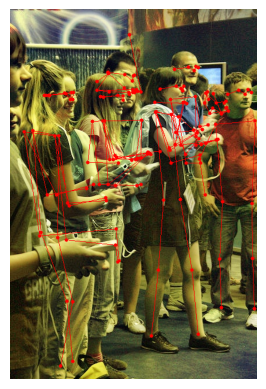

In [113]:
visualize_pose(172946)